The file 'customer_reviews.csv' was not found. Creating a sample dataset...
Sample dataset created as 'customer_reviews.csv'
Missing Values Summary:
Review_Text         1
Rating              1
Customer_Age        1
Product_Price       0
Product_Category    0
dtype: int64


C:\Users\palla\AppData\Local\Temp\ipykernel_11156\3616228258.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)
C:\Users\palla\AppData\Local\Temp\ipykernel_11156\3616228258.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

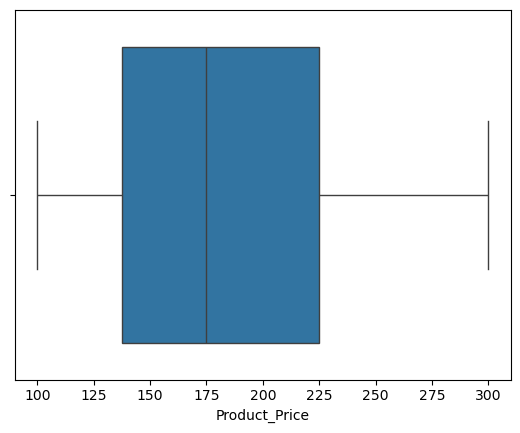

Data Cleaning Completed. Cleaned dataset saved as 'cleaned_customer_reviews.csv'


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import os

# Check if file exists before loading
data_file = "customer_reviews.csv"
if not os.path.exists(data_file):
    print(f"The file '{data_file}' was not found. Creating a sample dataset...")
    data = {
        "Review_Text": ["Great product!", "Not worth the price", None, "Amazing quality!"],
        "Rating": [5, 2, None, 4],
        "Customer_Age": [25, None, 32, 45],
        "Product_Price": [100, 200, 150, 300],
        "Product_Category": ["Electronics", "Appliances", "Electronics", "Clothing"]
    }
    df = pd.DataFrame(data)
    df.to_csv(data_file, index=False)
    print(f"Sample dataset created as '{data_file}'")
else:
    # Load dataset
    df = pd.read_csv(data_file)

# Identify missing values
print("Missing Values Summary:")
print(df.isna().sum())

# Handling missing values
if 'Rating' in df.columns:
    df['Rating'].fillna(df['Rating'].median(), inplace=True)
if 'Customer_Age' in df.columns:
    df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
if 'Review_Text' in df.columns:
    df['Review_Text'].fillna("No review provided", inplace=True)

# Detect and remove duplicates
df.drop_duplicates(subset=['Review_Text'], inplace=True)

# Handle inconsistent data
if 'Rating' in df.columns:
    df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]
if 'Product_Category' in df.columns:
    df['Product_Category'] = df['Product_Category'].str.lower().str.strip()

# Identify and handle outliers
if 'Product_Price' in df.columns:
    sns.boxplot(x=df['Product_Price'])
    plt.show()
    df = df[(df['Product_Price'] > df['Product_Price'].quantile(0.01)) & (df['Product_Price'] < df['Product_Price'].quantile(0.99))]

# Convert categorical data to numerical format
if 'Product_Category' in df.columns:
    label_encoder = LabelEncoder()
    df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])

# Save cleaned dataset
cleaned_file = "cleaned_customer_reviews.csv"
df.to_csv(cleaned_file, index=False)

# Display completion message
print(f"Data Cleaning Completed. Cleaned dataset saved as '{cleaned_file}'")
